In [4]:
import sys, os, fnmatch

import pandas as pd
import numpy as np
import sys
import random
import math

from trackml.dataset import load_event
from trackml.dataset import load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import seaborn as sns
from matplotlib import pyplot as plt

sys.path.append('/home/silvio/git2/track-ml-1/utils')
from tracktop import *
sys.path.append('/home/silvio/git2/track-ml-1/')
from lib_data_manipulation import *

['particle_id', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'q', 'n_hits', 'hit_id_0', 'x_0', 'y_0', 'z_0', 'volume_id_0', 'layer_id_0', 'module_id_0', 'value_0', 'hit_id_1', 'x_1', 'y_1', 'z_1', 'volume_id_1', 'layer_id_1', 'module_id_1', 'value_1', 'hit_id_2', 'x_2', 'y_2', 'z_2', 'volume_id_2', 'layer_id_2', 'module_id_2', 'value_2', 'hit_id_3', 'x_3', 'y_3', 'z_3', 'volume_id_3', 'layer_id_3', 'module_id_3', 'value_3', 'hit_id_4', 'x_4', 'y_4', 'z_4', 'volume_id_4', 'layer_id_4', 'module_id_4', 'value_4', 'hit_id_5', 'x_5', 'y_5', 'z_5', 'volume_id_5', 'layer_id_5', 'module_id_5', 'value_5', 'hit_id_6', 'x_6', 'y_6', 'z_6', 'volume_id_6', 'layer_id_6', 'module_id_6', 'value_6', 'hit_id_7', 'x_7', 'y_7', 'z_7', 'volume_id_7', 'layer_id_7', 'module_id_7', 'value_7', 'hit_id_8', 'x_8', 'y_8', 'z_8', 'volume_id_8', 'layer_id_8', 'module_id_8', 'value_8', 'hit_id_9', 'x_9', 'y_9', 'z_9', 'volume_id_9', 'layer_id_9', 'module_id_9', 'value_9', 'hit_id_10', 'x_10', 'y_10', 'z_10', 'volume_id_10', 

"\ndftemp = pd.DataFrame(index=range(len(dforig)),columns=range(3))\n\ndftemp[0]=dforig.iloc[:,[4]]\ndftemp[1]=dforig.iloc[:,[5]]\ndftemp[3]=dforig.iloc[:,[41]] # hit id\n\n\n#dftemp[4]=df3dapp.iloc[:,[3]] # hit id\ndftemp[2]=(dftemp[0]*dftemp[0]+dftemp[1]*dftemp[1])**(1/2)\n\nfig0, ax0 = plt.subplots()\nax0.hist(dftemp[2],  label='pt',bins=100)\nleg0 = ax0.legend();\n\n\napp.columns = ['hit_id','x','y', 'z']\ndftemp.columns = ['px','py','pt', 'hit_id']\nprint(app.head())\nprint(dftemp.head())\n\ndftemp.join(app.set_index('hit_id')[['x','y','z']], on='hit_id')\n\n#app.join(dftemp.set_index('hit_id')[['pt']], on='hit_id')\n\nprint(app)\nprint(dftemp)\n#print(dftemp[4])\n\n#dftemp2=\n#dftemp.join(df3dapp, left_on='hit_id', right_on='hit_id', lsuffix='_caller', rsuffix='_other')\n#dftemp.join(app, left_on='hit_id', right_on='hit_id_4', lsuffix='_caller', rsuffix='_other')\n\n#mergedDf = dftemp.merge(df3dapp)\n\n#dftemp.join(df2.set_index('id1')[['price']], on='id')\n"

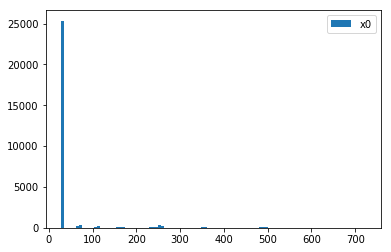

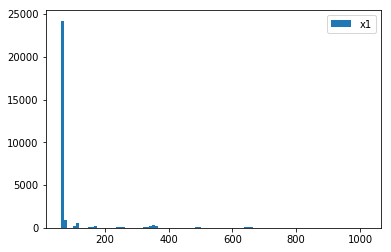

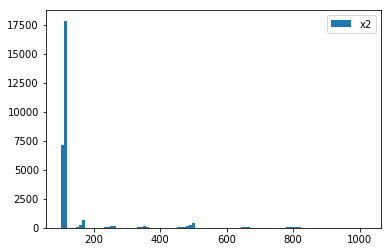

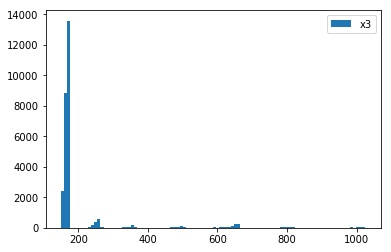

In [142]:
#original tracks -> generated by Jfialho Lib
dforig = pd.read_csv("/home/silvio/train.csv")#, index_col='hit_id_4')

dftemp = pd.DataFrame(index=range(len(dforig)),columns=range(3))

#print(dforig.head())
l=dforig.columns.values.tolist()
print(l)

dftemp[0]=dforig.iloc[:,[10]]
dftemp[1]=dforig.iloc[:,[18]]
dftemp[2]=dforig.iloc[:,[26]]
dftemp[3]=dforig.iloc[:,[34]]

dftempAUX = dftemp[ (dftemp[0] != 0) & (dftemp[1] != 0)& (dftemp[2] != 0) & (dftemp[3] != 0)]
dftemp = dftempAUX


fig0, ax0 = plt.subplots()
ax0.hist(dftemp[0],  label='x0',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp[1],  label='x1',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp[2],  label='x2',bins=100)
leg2 = ax2.legend();

fig3, ax3 = plt.subplots()
ax3.hist(dftemp[3],  label='x3',bins=100)
leg3 = ax3.legend();




'''
dftemp = pd.DataFrame(index=range(len(dforig)),columns=range(3))

dftemp[0]=dforig.iloc[:,[4]]
dftemp[1]=dforig.iloc[:,[5]]
dftemp[3]=dforig.iloc[:,[41]] # hit id


#dftemp[4]=df3dapp.iloc[:,[3]] # hit id
dftemp[2]=(dftemp[0]*dftemp[0]+dftemp[1]*dftemp[1])**(1/2)

fig0, ax0 = plt.subplots()
ax0.hist(dftemp[2],  label='pt',bins=100)
leg0 = ax0.legend();


app.columns = ['hit_id','x','y', 'z']
dftemp.columns = ['px','py','pt', 'hit_id']
print(app.head())
print(dftemp.head())

dftemp.join(app.set_index('hit_id')[['x','y','z']], on='hit_id')

#app.join(dftemp.set_index('hit_id')[['pt']], on='hit_id')

print(app)
print(dftemp)
#print(dftemp[4])

#dftemp2=
#dftemp.join(df3dapp, left_on='hit_id', right_on='hit_id', lsuffix='_caller', rsuffix='_other')
#dftemp.join(app, left_on='hit_id', right_on='hit_id_4', lsuffix='_caller', rsuffix='_other')

#mergedDf = dftemp.merge(df3dapp)

#dftemp.join(df2.set_index('id1')[['price']], on='id')
'''

(35110, 17)
(25222, 17)
(25222, 17)


(array([3.584e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.030e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        7.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.100e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

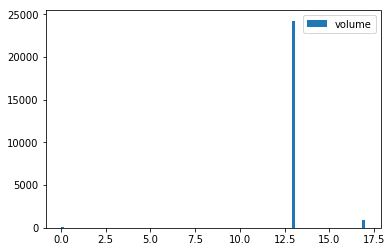

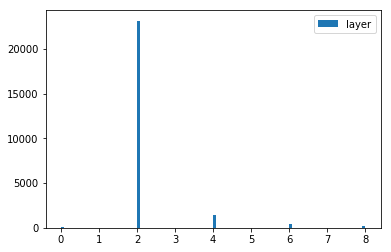

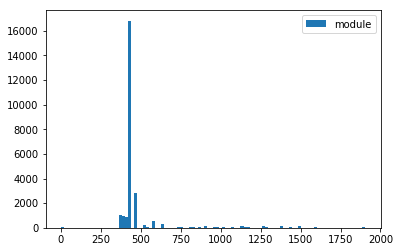

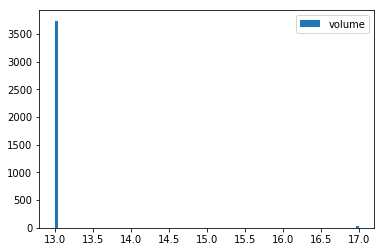

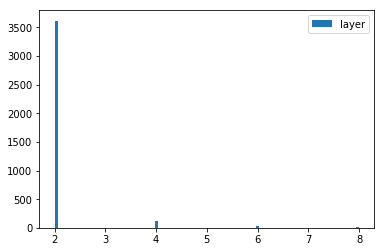

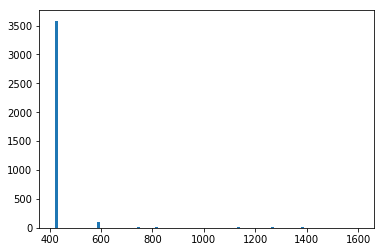

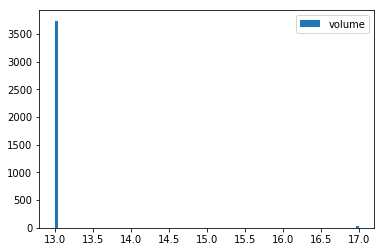

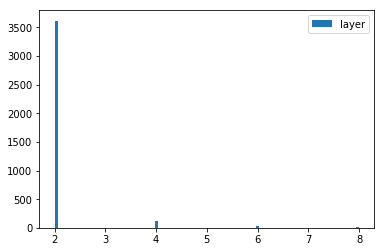

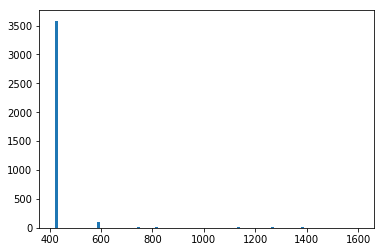

In [48]:
#evaluate Prediction Results

#predicted track
df3dapp = pd.read_csv("/home/silvio/Res3")

#before map to closest hit
df3d = pd.read_csv("/home/silvio/beforemappingRes3")

#original track
dforig = pd.read_csv("/home/silvio/resorg")


dftemp = pd.DataFrame(index=range(len(dforig)),columns=range(17))
dftemp[0]=dforig.iloc[:,[0]]
dftemp[1]=dforig.iloc[:,[1]]
dftemp[2]=dforig.iloc[:,[2]]

dftemp[3]=df3d.iloc[:,[0]]
dftemp[4]=df3d.iloc[:,[1]]
dftemp[5]=df3d.iloc[:,[2]]

dftemp[6]=df3dapp.iloc[:,[0]]
dftemp[7]=df3dapp.iloc[:,[1]]
dftemp[8]=df3dapp.iloc[:,[2]]

dftemp[9]=(((dftemp[0]-dftemp[3])**2)+((dftemp[1]-dftemp[4])**2)+((dftemp[2]-dftemp[5])**2)).pow(1./2)
dftemp[10]=(((dftemp[0]-dftemp[6])**2)+((dftemp[1]-dftemp[7])**2)+((dftemp[2]-dftemp[8])**2)).pow(1./2)
dftemp[11]=(((dftemp[3]-dftemp[6])**2)+((dftemp[4]-dftemp[7])**2)+((dftemp[5]-dftemp[8])**2)).pow(1./2)

dftemp[12]=df3dapp.iloc[:,[4]]
dftemp[13]=df3dapp.iloc[:,[5]]
dftemp[14]=df3dapp.iloc[:,[6]]
dftemp[15]=df3dapp.iloc[:,[7]]

print(dftemp.shape)
dftempAUX = dftemp[ (dftemp[0] != 0) & (dftemp[1] != 0)& (dftemp[2] != 0) ]
print(dftempAUX.shape)

dftemp = dftempAUX
print(dftemp.shape)

'''
#approximation diff
fig0, ax0 = plt.subplots()
ax0.hist(dftemp[6],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp[7],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp[8],  label='Z',bins=100)
leg2 = ax2.legend();

dftemp23 = dftemp[ (dftemp[10] <= 20)]

fig0, ax0 = plt.subplots()
ax0.hist(dftemp23[6],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp23[7],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp23[8],  label='Z',bins=100)
leg2 = ax2.legend();


dftemp23 = dftemp[ (dftemp[10] >= 300)]

fig0, ax0 = plt.subplots()
ax0.hist(dftemp23[6],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp23[7],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp23[8],  label='Z',bins=100)
leg2 = ax2.legend();

'''

'''
#approximation diff
fig0, ax0 = plt.subplots()
ax0.hist(dftemp[0],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp[1],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp[2],  label='Z',bins=100)
leg2 = ax2.legend();

'''
fig3, ax3 = plt.subplots()
ax3.hist(dftemp[12],  label='volume',bins=100)
leg3 = ax3.legend();

fig4, ax4 = plt.subplots()
ax4.hist(dftemp[13],  label='layer',bins=100)
leg4 = ax4.legend();

fig5, ax5 = plt.subplots()
ax5.hist(dftemp[14],  label='module',bins=100)
leg5 = ax5.legend();


dftemp24 = dftemp[ (dftemp[10] <= 20)]
'''
fig00, ax00 = plt.subplots()
ax00.hist(dftemp24[0],  label='X',bins=100)
leg00 = ax00.legend();

fig11, ax11 = plt.subplots()
ax11.hist(dftemp24[1],  label='Y',bins=100)
leg11 = ax11.legend();

fig22, ax22 = plt.subplots()
ax22.hist(dftemp24[2],  label='Z',bins=100)
leg22 = ax22.legend();
'''

'''
fig0, ax0 = plt.subplots()
ax0.hist(dftemp24[6],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp24[7],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp24[8],  label='Z',bins=100)
leg2 = ax2.legend();
'''

fig3, ax3 = plt.subplots()
ax3.hist(dftemp24[12],  label='volume',bins=100)
leg3 = ax3.legend();

fig4, ax4 = plt.subplots()
ax4.hist(dftemp24[13],  label='layer',bins=100)
leg4 = ax4.legend();

fig5, ax5 = plt.subplots()
ax5.hist(dftemp24[14],  label='module',bins=100)


'''
dftemp24 = dftemp[ (dftemp[10] >= 300)]

fig00, ax00 = plt.subplots()
ax00.hist(dftemp24[0],  label='X',bins=100)
leg00 = ax00.legend();

fig11, ax11 = plt.subplots()
ax11.hist(dftemp24[1],  label='Y',bins=100)
leg11 = ax11.legend();

fig22, ax22 = plt.subplots()
ax22.hist(dftemp24[2],  label='Z',bins=100)
leg22 = ax22.legend();

fig0, ax0 = plt.subplots()
ax0.hist(dftemp24[6],  label='X',bins=100)
leg0 = ax0.legend();

fig1, ax1 = plt.subplots()
ax1.hist(dftemp24[7],  label='Y',bins=100)
leg1 = ax1.legend();

fig2, ax2 = plt.subplots()
ax2.hist(dftemp24[8],  label='Z',bins=100)
leg2 = ax2.legend();
'''

fig3, ax3 = plt.subplots()
ax3.hist(dftemp24[12],  label='volume',bins=100)
leg3 = ax3.legend();

fig4, ax4 = plt.subplots()
ax4.hist(dftemp24[13],  label='layer',bins=100)
leg4 = ax4.legend();

fig5, ax5 = plt.subplots()
ax5.hist(dftemp24[14],  label='module',bins=100)

average distance prediction (mm):  50.12807854453198
STD DV distance prediction (mm):  81.27997509218098
average distance approximation (mm):  49.94707677717148
STD DV distance approximation (mm):  83.68710558643829
Amount of tracks:  35110
0 mm:  8204
App 20 mm diff:  11940
App 25 mm diff:  13687
App 30 mm diff:  15644
Pred 5 mm diff:  7828
App 5 mm diff:  8428
Pred 5-15 mm diff:  2044
App 5-15 mm diff:  1991
Pred 15-20 mm diff:  1491
App 15-20 mm diff:  1521
20  (23524, 12)
500  (223, 12)
20  (22930, 12)
500  (23170, 12)
500  (370, 12)


AttributeError: 'tuple' object has no attribute 'hist'

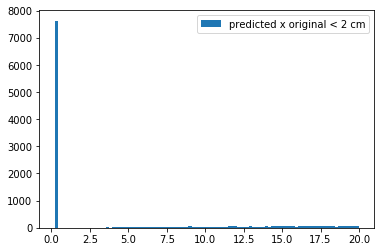

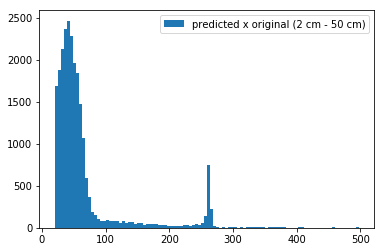

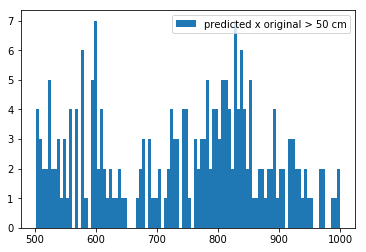

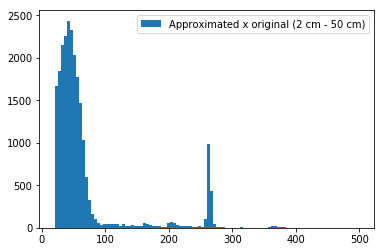

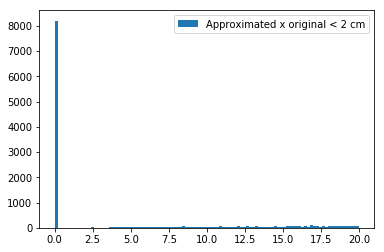

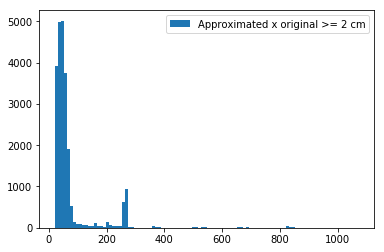

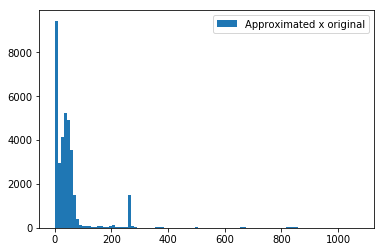

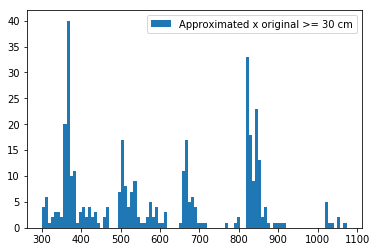

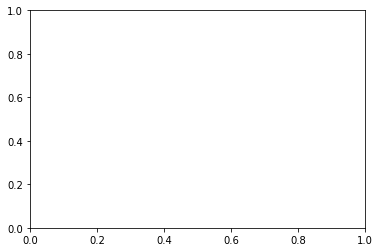

In [27]:
#evaluate Prediction Results

#predicted track
df3dapp = pd.read_csv("/home/silvio/Res3")

#before map to closest hit
df3d = pd.read_csv("/home/silvio/beforemappingRes3")

#original track
dforig = pd.read_csv("/home/silvio/resorg")


dftemp = pd.DataFrame(index=range(len(dforig)),columns=range(12))
dftemp[0]=dforig.iloc[:,[0]]
dftemp[1]=dforig.iloc[:,[1]]
dftemp[2]=dforig.iloc[:,[2]]

dftemp[3]=df3d.iloc[:,[0]]
dftemp[4]=df3d.iloc[:,[1]]
dftemp[5]=df3d.iloc[:,[2]]

dftemp[6]=df3dapp.iloc[:,[0]]
dftemp[7]=df3dapp.iloc[:,[1]]
dftemp[8]=df3dapp.iloc[:,[2]]

dftemp[9]=(((dftemp[0]-dftemp[3])**2)+((dftemp[1]-dftemp[4])**2)+((dftemp[2]-dftemp[5])**2)).pow(1./2)
dftemp[10]=(((dftemp[0]-dftemp[6])**2)+((dftemp[1]-dftemp[7])**2)+((dftemp[2]-dftemp[8])**2)).pow(1./2)
dftemp[11]=(((dftemp[3]-dftemp[6])**2)+((dftemp[4]-dftemp[7])**2)+((dftemp[5]-dftemp[8])**2)).pow(1./2)



dftemp=dftemp.sort_values(by=[10])

print ("average distance prediction (mm): " , dftemp[9].mean())
print ("STD DV distance prediction (mm): " , dftemp[9].std())
print ("average distance approximation (mm): " , dftemp[10].mean())
print ("STD DV distance approximation (mm): " , dftemp[10].std())

print ("Amount of tracks: " , dforig.shape[0])
dftemp22 = dftemp[ dftemp[10] == 0]

totalok=dftemp22.shape[0]
print ("0 mm: " , dftemp22.shape[0])

dftemp22 = dftemp[ dftemp[10] <= 20]
totalok=totalok+dftemp22.shape[0]
print ("App 20 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ dftemp[10] <= 25]
totalok=totalok+dftemp22.shape[0]
print ("App 25 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ dftemp[10] <= 30]
totalok=totalok+dftemp22.shape[0]
print ("App 30 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ dftemp[9] <= 5]
totalok=totalok+dftemp22.shape[0]
print ("Pred 5 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ dftemp[10] <= 5]
totalok=totalok+dftemp22.shape[0]
print ("App 5 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ (dftemp[9] > 5) & (dftemp[9] <= 15)]
totalok=totalok+dftemp22.shape[0]
print ("Pred 5-15 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ (dftemp[10] > 5) & (dftemp[10] <= 15)]
totalok=totalok+dftemp22.shape[0]
print ("App 5-15 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ (dftemp[9] > 15) & (dftemp[9] <= 20)]
totalok=totalok+dftemp22.shape[0]
print ("Pred 15-20 mm diff: " , dftemp22.shape[0])

dftemp22 = dftemp[ (dftemp[10] > 15) & (dftemp[10] <= 20)]
totalok=totalok+dftemp22.shape[0]
print ("App 15-20 mm diff: " , dftemp22.shape[0])

dftemp23 = dftemp[ (dftemp[9] < 20)]
fig2, ax2 = plt.subplots()
ax2.hist(dftemp23[9],  label='predicted x original < 2 cm',bins=100)
leg2 = ax2.legend();

fig2.savefig("/home/silvio/pred2.png")

dftemp23 = dftemp[ (dftemp[9] > 20) & (dftemp[9] <= 500)] 
print("20 " , dftemp23.shape)
fig3, ax3 = plt.subplots()
ax3.hist(dftemp23[9],  label='predicted x original (2 cm - 50 cm)',bins=100)
leg3 = ax3.legend();

fig3.savefig("/home/silvio/pred3.png")

dftemp23 = dftemp[ (dftemp[9] >= 500)]
print("500 " , dftemp23.shape)
fig4, ax4 = plt.subplots()
ax4.hist(dftemp23[9],  label='predicted x original > 50 cm',bins=100)
leg4 = ax4.legend();

fig4.savefig("/home/silvio/pred4.png")


dftemp23 = dftemp[ (dftemp[10] > 20) & (dftemp[10] <= 500)]
print("20 " , dftemp23.shape)
fig6, ax6 = plt.subplots()
ax6.hist(dftemp23[10],  label='Approximated x original (2 cm - 50 cm)',bins=100)
leg6 = ax6.legend();

fig6.savefig("/home/silvio/app3.png")

dftemp23 = dftemp[ (dftemp[10] < 20)]
fig5, ax5 = plt.subplots()
ax5.hist(dftemp23[10],  label='Approximated x original < 2 cm',bins=100)
leg5 = ax5.legend();

fig5.savefig("/home/silvio/app2.png")

dftemp23 = dftemp[ (dftemp[10] >= 20)]
print("500 " , dftemp23.shape)
fig7, ax7 = plt.subplots()
ax7.hist(dftemp23[10],  label='Approximated x original >= 2 cm',bins=100)
leg7 = ax7.legend();

fig7.savefig("/home/silvio/app4.png")


#dftemp23 = dftemp[ (dftemp[10] >= 500)]
#print("500 " , dftemp23.shape)
fig8, ax8 = plt.subplots()
ax8.hist(dftemp[10],  label='Approximated x original',bins=100)
leg8 = ax8.legend();

fig8.savefig("/home/silvio/app5.png")


dftemp23 = dftemp[ (dftemp[10] >= 300)]
print("500 " , dftemp23.shape)
fig7, ax7 = plt.subplots()
ax7.hist(dftemp23[10],  label='Approximated x original >= 30 cm',bins=100)
leg7 = ax7.legend();

#fig7.savefig("/home/silvio/app4.png")
ax7 = plt.subplots()
ax7.hist(dftemp23[7],  label='Eixo X',bins=100)

In [4]:
# Define regions in track
# eta = arctanh(pz/sqrt( px*px + py*py + pz*pz))

original_tracks="/home/silvio/inputTrain"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal['eta'] = np.arctanh(dfOriginal['12']/np.sqrt(dfOriginal['10']*dfOriginal['10']+dfOriginal['11']*dfOriginal['11']+dfOriginal['12']*dfOriginal['12']))
dfOriginal['eta2'] = np.arctanh(dfOriginal['20']/np.sqrt(dfOriginal['18']*dfOriginal['18']+dfOriginal['19']*dfOriginal['19']+dfOriginal['20']*dfOriginal['20']))
dfOriginal['eta3'] = np.arctanh(dfOriginal['28']/np.sqrt(dfOriginal['26']*dfOriginal['26']+dfOriginal['27']*dfOriginal['27']+dfOriginal['28']*dfOriginal['28']))
dfOriginal['eta4'] = np.arctanh(dfOriginal['36']/np.sqrt(dfOriginal['34']*dfOriginal['34']+dfOriginal['35']*dfOriginal['35']+dfOriginal['36']*dfOriginal['36']))

dfOriginal['rho']  = np.sqrt((dfOriginal['10']*dfOriginal['10']) +(dfOriginal['11']*dfOriginal['11']))
dfOriginal['rho2'] = np.sqrt((dfOriginal['18']*dfOriginal['18']) +(dfOriginal['19']*dfOriginal['19']))
dfOriginal['rho3'] = np.sqrt((dfOriginal['26']*dfOriginal['26']) +(dfOriginal['27']*dfOriginal['27']))
dfOriginal['rho4'] = np.sqrt((dfOriginal['34']*dfOriginal['34']) +(dfOriginal['35']*dfOriginal['35']))

dfOriginal['phi']  = np.arctan2(dfOriginal['10'],dfOriginal['11'])
dfOriginal['phi2']  = np.arctan2(dfOriginal['18'],dfOriginal['19'])
dfOriginal['phi3']  = np.arctan2(dfOriginal['26'],dfOriginal['27'])
dfOriginal['phi4']  = np.arctan2(dfOriginal['34'],dfOriginal['35'])


dfbarrel=dfOriginal[ np.abs(dfOriginal['eta'] < 1) & np.abs(dfOriginal['eta2'] < 1) & np.abs(dfOriginal['eta3'] < 1)] 
print("barrel " , dfbarrel.shape)

interm=dfOriginal[np.abs(dfOriginal['eta'] > 1) & np.abs(dfOriginal['eta'] < 2)]
print("interm " , interm.shape)

tampa=dfOriginal[(np.abs(dfOriginal['eta'] > 2) & np.abs(dfOriginal['eta2'] > 2) & np.abs(dfOriginal['eta3'] > 2) & np.abs(dfOriginal['eta4'] > 2))]
print("tampa ",tampa.shape)


#  
tampa2=tampa[ ((tampa['phi'] >= -1) & (tampa['phi'] <=1) )]
print("tampa2.shape", tampa2.shape)
tampa3=tampa[ ((tampa['phi'] > 1) & (tampa['phi'] <4) )]
print("tampa3.shape", tampa3.shape)
tampa4=tampa[ ((tampa['phi'] >= -4) & (tampa['phi'] <-1) )]
print("tampa4.shape", tampa4.shape)


beginPHI=-0.3
endPHI=0.3
beginETA=-0.3
endETA=0.3

hotzone=dfOriginal[( (np.abs(dfOriginal['phi'] >= beginPHI) & np.abs(dfOriginal['phi'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi2'] >= beginPHI) & np.abs(dfOriginal['phi2'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi3'] >= beginPHI) & np.abs(dfOriginal['phi3'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi4'] >= beginPHI) & np.abs(dfOriginal['phi4'] <= endPHI))

                    & (np.abs(dfOriginal['eta'] >= beginETA) & np.abs(dfOriginal['eta'] <= endETA))
                    & (np.abs(dfOriginal['eta2'] >= beginETA) & np.abs(dfOriginal['eta2'] <= endETA))
                    & (np.abs(dfOriginal['eta3'] >= beginETA) & np.abs(dfOriginal['eta3'] <= endETA))
                    & (np.abs(dfOriginal['eta4'] >= beginETA) & np.abs(dfOriginal['eta4'] <= endETA))
)]

print("hotzone " , hotzone.shape)
hotzone.to_csv('/home/silvio/testNN', index = False)



barrel  (41940, 181)
interm  (9334, 181)
tampa  (16762, 181)
tampa2.shape (5388, 181)
tampa3.shape (5654, 181)
tampa4.shape (5720, 181)
hotzone  (191, 181)


In [5]:
#select tracks from a certain region of tracker for inference

original_tracks="/home/silvio/inputInf"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal['eta'] = np.arctanh(dfOriginal['12']/np.sqrt(dfOriginal['10']*dfOriginal['10']+dfOriginal['11']*dfOriginal['11']+dfOriginal['12']*dfOriginal['12']))
dfOriginal['eta2'] = np.arctanh(dfOriginal['20']/np.sqrt(dfOriginal['18']*dfOriginal['18']+dfOriginal['19']*dfOriginal['19']+dfOriginal['20']*dfOriginal['20']))
dfOriginal['eta3'] = np.arctanh(dfOriginal['28']/np.sqrt(dfOriginal['26']*dfOriginal['26']+dfOriginal['27']*dfOriginal['27']+dfOriginal['28']*dfOriginal['28']))
dfOriginal['eta4'] = np.arctanh(dfOriginal['36']/np.sqrt(dfOriginal['34']*dfOriginal['34']+dfOriginal['35']*dfOriginal['35']+dfOriginal['36']*dfOriginal['36']))

dfOriginal['phi']  = np.arctan2(dfOriginal['10'],dfOriginal['11'])
dfOriginal['phi2']  = np.arctan2(dfOriginal['18'],dfOriginal['19'])
dfOriginal['phi3']  = np.arctan2(dfOriginal['26'],dfOriginal['27'])
dfOriginal['phi4']  = np.arctan2(dfOriginal['34'],dfOriginal['35'])

print(dfOriginal.shape)


dfbarrel=dfOriginal[ np.abs(dfOriginal['eta'] < 1) & np.abs(dfOriginal['eta2'] < 1) & np.abs(dfOriginal['eta3'] < 1) & np.abs(dfOriginal['eta4'] < 1)]
print("barrel " , dfbarrel.shape)

interm=dfOriginal[np.abs(dfOriginal['eta'] > 1) & np.abs(dfOriginal['eta'] < 2)]
print("interm " , interm.shape)

tampa=dfOriginal[(np.abs(dfOriginal['eta'] > 2) & np.abs(dfOriginal['eta2'] > 2) & np.abs(dfOriginal['eta3'] > 2) & np.abs(dfOriginal['eta4'] > 2))]
print("tampa ",tampa.shape)


beginPHI=-0.3
endPHI=0.3
beginETA=-0.3
endETA=0.3

hotzone=dfOriginal[( (np.abs(dfOriginal['phi'] >= beginPHI) & np.abs(dfOriginal['phi'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi2'] >= beginPHI) & np.abs(dfOriginal['phi2'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi3'] >= beginPHI) & np.abs(dfOriginal['phi3'] <= endPHI)) 
                    & (np.abs(dfOriginal['phi4'] >= beginPHI) & np.abs(dfOriginal['phi4'] <= endPHI))

                    & (np.abs(dfOriginal['eta'] >= beginETA) & np.abs(dfOriginal['eta'] <= endETA))
                    & (np.abs(dfOriginal['eta2'] >= beginETA) & np.abs(dfOriginal['eta2'] <= endETA))
                    & (np.abs(dfOriginal['eta3'] >= beginETA) & np.abs(dfOriginal['eta3'] <= endETA))
                    & (np.abs(dfOriginal['eta4'] >= beginETA) & np.abs(dfOriginal['eta4'] <= endETA))
)]

print("hotzone " , hotzone.shape)

hotzone.to_csv('/home/silvio/testInf', index = False)

(70000, 177)
barrel  (41791, 177)
interm  (9399, 177)
tampa  (16810, 177)
hotzone  (233, 177)


In [ ]:
create_graphic_org(original_tracks='/home/silvio/resorg',path_original_track='/home/silvio/orig.html', tracks=1000)
create_graphic_org(original_tracks='/home/silvio/beforemappingRes3',path_original_track='/home/silvio/pred.html', tracks=1000)
create_graphic_org(original_tracks='/home/silvio/Res3',path_original_track='/home/silvio/homeremoto/app.html', tracks=1000)


In [6]:
import numexpr as ne

def geo_dist(x,y,z):
    return ne.evaluate('sqrt(x**2 + y**2 + z**2)')

def xyz_bsort(df_to_be_sorted, **kwargs):

    pivot = 8
    shift = 1
    
    #if kwargs.get('pivot'):
    #    pivot = kwargs.get('pivot')

    index_xyz = []
    df_n_col  = df_to_be_sorted.shape[0] // pivot

    for aux in range(0,df_n_col):
        pivot_tmp = pivot * aux
        x = df_to_be_sorted.iloc[pivot_tmp + 0 + shift]
        y = df_to_be_sorted.iloc[pivot_tmp + 1 + shift]
        z = df_to_be_sorted.iloc[pivot_tmp + 2 + shift]
        index_xyz.append(geo_dist(x, y, z))
    for i in range(1, len(index_xyz)):
        for j in range(0, len(index_xyz) - i):
            if index_xyz[j] > index_xyz[j + 1]:
                xyz_swap(df_to_be_sorted, index_xyz, j, j + 1, pivot)

In [7]:
dfOriginal = pd.read_csv("/home/silvio/testNN")

particle_info=9

for i in range(dfOriginal.shape[0]):
    xyz_bsort(dfOriginal.iloc[i, particle_info:])
    
dfOriginal.to_csv("/home/silvio/testNNSort", index = False)

dfOriginal = pd.read_csv('/home/silvio/testInf')

particle_info=9

for i in range(dfOriginal.shape[0]):
    xyz_bsort(dfOriginal.iloc[i, particle_info:])
    
dfOriginal.to_csv('/home/silvio/testInfSort', index = False)



KeyboardInterrupt: 

In [ ]:
#create new Input file
create_input_data(event_prefix = "/home/silvio/all-Train.csv" , output_prefix = "/home/silvio/inputTrain", aux_am_per_hit=10000, min=5, max=11, maximunAmountofHitsinDB=20, columnsperhit=8, firstColumnAfterParticle=9)
create_input_data(event_prefix = "/home/silvio/all-Inf.csv" , output_prefix = "/home/silvio/inputInf", aux_am_per_hit=10000, min=5, max=11, maximunAmountofHitsinDB=20, columnsperhit=8, firstColumnAfterParticle=9)


dfOriginal3 = pd.read_csv("/home/silvio/all-Train.csv")
print(dfOriginal3.shape)
dfOriginal4 = pd.read_csv("/home/silvio/inputTrain")
print(dfOriginal4.shape)

print(dfOriginal3.iloc[0:10,9:25])
print(dfOriginal4.iloc[0:10,:9:25])


In [ ]:
#remove extra index column from original track files

dfOriginal = pd.read_csv("/home/silvio/all-Train.csv")

dfOriginal.drop('Unnamed: 0.1', axis=1, inplace=True)
dfOriginal.to_csv("/home/silvio/all-Train2.csv", index = False)

dfOriginal = pd.read_csv("/home/silvio/all-Inf.csv")
dfOriginal.drop('Unnamed: 0.1', axis=1, inplace=True)
dfOriginal.to_csv("/home/silvio/all-Inf2.csv", index = False)



for i in range(n_tracks):
    xyz_bsort(df_input_nn_sort.iloc[i, particle_info:])

In [ ]:
dfOriginal = pd.read_csv("/home/silvio/all-Inf.csv")

print(dfOriginal)

In [ ]:
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/barrelVIZ',path_original_track='/home/silvio/homeremoto/headtop/barrelVIZ.html', tracks=2000)
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/testInf3VIZ',path_original_track='/home/silvio/homeremoto/headtop/testInf3VIZ.html', tracks=232)






create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/testInfSortVIZ',path_original_track='/home/silvio/homeremoto/headtop/testInfSortVIZ.html', tracks=1000)
create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/testInfVIZ',path_original_track='/home/silvio/homeremoto/headtop/testInfVIZ.html', tracks=1000)


#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/tampaVIZ',path_original_track='/home/silvio/homeremoto/headtop/dftampaVIZ.html', tracks=1000)
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/tampaVIZ3',path_original_track='/home/silvio/homeremoto/headtop/dftampaVIZ3.html', tracks=1000)
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/tampaVIZ4',path_original_track='/home/silvio/homeremoto/headtop/dftampaVIZ4.html', tracks=1000)

#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/tampaVIZ3',path_original_track='/home/silvio/homeremoto/headtop/dftampaVIZ3.html', tracks=1000)

#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/barrelVIZ',path_original_track='/home/silvio/homeremoto/headtop/dfbarrelVIZ.html', tracks=800)
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/barrelVIZ3',path_original_track='/home/silvio/homeremoto/headtop/dfbarrelVIZ3.html' , tracks=59)

#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/intermVIZ',path_original_track='/home/silvio/homeremoto/headtop/dfintermVIZ.html', tracks=800)
#create_graphic_org(original_tracks='/home/silvio/homeremoto/headtop/intermVIZ3',path_original_track='/home/silvio/homeremoto/headtop/dfintermVIZ3.html', tracks=59)

In [ ]:
# Define regions in track
# eta = arctanh(pz/sqrt( px*px + py*py + pz*pz))

original_tracks="/home/silvio/homeremoto/headtop/inputTrain"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal['eta'] = np.arctanh(dfOriginal2['12']/np.sqrt(dfOriginal2['10']*dfOriginal2['10']+dfOriginal2['11']*dfOriginal2['11']+dfOriginal2['12']*dfOriginal2['12']))

print(dfOriginal.shape)

#print(dfOriginal['eta'])

dfbarrel=dfOriginal[ np.abs(dfOriginal['eta'] < 1)]
print("barrel " , dfbarrel.shape)

interm=dfOriginal[np.abs(dfOriginal['eta'] > 1) & np.abs(dfOriginal['eta'] < 2)]
print("interm " , interm.shape)

tampa=dfOriginal[np.abs(dfOriginal['eta'] > 2)]
print("tampa ",tampa.shape)

tampa.to_csv('/home/silvio/homeremoto/headtop/testNN')

In [ ]:
#Define regions in track

#original_tracks="/home/silvio/homeremoto/headtop/input_files_for_track/input-reconstruct_top04"
original_tracks="/home/silvio/homeremoto/headtop/inputTrain"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal.drop('Unnamed: 0', axis=1, inplace=True)
dfOriginal.drop('Unnamed: 0.1', axis=1, inplace=True)
dfOriginal.drop('Unnamed: 0.1.1', axis=1, inplace=True)

dfOriginal2 = dfOriginal.iloc[:,:]

print("max X ",dfOriginal2['10'].max())
print("max Y ",dfOriginal2['11'].max())
print("max Z ",dfOriginal2['12'].max())

print("min X ",dfOriginal2['10'].min())
print("min Y ",dfOriginal2['11'].min())
print("min Z ",dfOriginal2['12'].min())
print(dfOriginal2.shape)
const=100
const2=-100

#dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2)) & ((dfOriginal2['11']  < const) & (dfOriginal2['11']  > const2)) & ((dfOriginal2['12']  < const) & (dfOriginal2['12']  > const2)) ) ]
#dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2)) & ((dfOriginal2['11']  < const) & (dfOriginal2['11']  > const2)) ) ]
dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2))  ) ]

print("after filtering X")

print("max X ",dfOriginal3['10'].max())
print("max Y ",dfOriginal3['11'].max())
print("max Z ",dfOriginal3['12'].max())

print("min X ",dfOriginal3['10'].min())
print("min Y ",dfOriginal3['11'].min())
print("min Z ",dfOriginal3['12'].min())

print(dfOriginal3.shape)

const=100
const2=-100
dfOriginal4=dfOriginal3.loc[ ( ((dfOriginal2['11']  < const) & (dfOriginal2['11']  > const2))  ) ]

print("after filtering Y")

print("max X ",dfOriginal4['10'].max())
print("max Y ",dfOriginal4['11'].max())
print("max Z ",dfOriginal4['12'].max())

print("min X ",dfOriginal4['10'].min())
print("min Y ",dfOriginal4['11'].min())
print("min Z ",dfOriginal4['12'].min())

print(dfOriginal3.shape)



In [ ]:
#select tracks from a certain region of tracker

#original_tracks="/home/silvio/homeremoto/headtop/input_files_for_track/input-reconstruct_top04"
original_tracks="/home/silvio/homeremoto/headtop/inputInf"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal.drop('Unnamed: 0', axis=1, inplace=True)
dfOriginal.drop('Unnamed: 0.1', axis=1, inplace=True)

dfOriginal2 = dfOriginal.iloc[:,9:]

print(dfOriginal2['10'].max())
print(dfOriginal2['11'].max())
print(dfOriginal2['12'].max())

print(dfOriginal2['10'].min())
print(dfOriginal2['11'].min())
print(dfOriginal2['12'].min())
print(dfOriginal2.shape)
const=45
const2=-45


dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2))  ) ]

print("after filtering X")

print("max X ",dfOriginal3['10'].max())
print("max Y ",dfOriginal3['11'].max())
print("max Z ",dfOriginal3['12'].max())

print("min X ",dfOriginal3['10'].min())
print("min Y ",dfOriginal3['11'].min())
print("min Z ",dfOriginal3['12'].min())

print(dfOriginal3.shape)

const=45
const2=-45
dfOriginal4=dfOriginal3.loc[ ( ((dfOriginal2['11']  < const) & (dfOriginal2['11']  > const2))  ) ]

print("after filtering Y")

print("max X ",dfOriginal4['10'].max())
print("max Y ",dfOriginal4['11'].max())
print("max Z ",dfOriginal4['12'].max())

print("min X ",dfOriginal4['10'].min())
print("min Y ",dfOriginal4['11'].min())
print("min Z ",dfOriginal4['12'].min())

print(dfOriginal4.shape)


const=45
const2=-45
dfOriginal5=dfOriginal4.loc[ ( ((dfOriginal4['12']  < const) & (dfOriginal4['12']  > const2))  ) ]

print("after filtering Z")

print("max X ",dfOriginal5['10'].max())
print("max Y ",dfOriginal5['11'].max())
print("max Z ",dfOriginal5['12'].max())

print("min X ",dfOriginal5['10'].min())
print("min Y ",dfOriginal5['11'].min())
print("min Z ",dfOriginal5['12'].min())

print(dfOriginal5.shape)



dfOriginal6 = dfOriginal5.iloc[0:206,:]

print(dfOriginal6.shape)
print('dfOriginal6')
print(dfOriginal6)

dfOriginal6.to_csv('/home/silvio/homeremoto/headtop/testInf')

#dfOriginal5 = pd.read_csv('/home/silvio/homeremoto/headtop/testInf2')

#print('dfOriginal5')
#print(dfOriginal5)

#print( dfOriginal4.iloc[:, 0:3])
#print( dfOriginal5.iloc[:, 0:3])
#print( dfOriginal4.iloc[:, [ 1,2,3,8,9,10,11,16,17,18,19,23]])

In [ ]:
#select tracks for training from a certain region of tracker

#original_tracks="/home/silvio/homeremoto/headtop/input_files_for_track/input-reconstruct_top04"
original_tracks="/home/silvio/homeremoto/headtop/inputTrain"
dfOriginal = pd.read_csv(original_tracks)

dfOriginal.drop('Unnamed: 0', axis=1, inplace=True)
dfOriginal.drop('Unnamed: 0.1', axis=1, inplace=True)
dfOriginal.drop('Unnamed: 0.1.1', axis=1, inplace=True)

dfOriginal2 = dfOriginal.iloc[:,:]

print("max X ",dfOriginal2['10'].max())
print("max Y ",dfOriginal2['11'].max())
print("max Z ",dfOriginal2['12'].max())

print("min X ",dfOriginal2['10'].min())
print("min Y ",dfOriginal2['11'].min())
print("min Z ",dfOriginal2['12'].min())
print(dfOriginal2.shape)
const=45
const2=-45

dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2))  ) ]

print("after filtering X")

print("max X ",dfOriginal3['10'].max())
print("max Y ",dfOriginal3['11'].max())
print("max Z ",dfOriginal3['12'].max())

print("min X ",dfOriginal3['10'].min())
print("min Y ",dfOriginal3['11'].min())
print("min Z ",dfOriginal3['12'].min())

print(dfOriginal3.shape)

const=45
const2=-45
dfOriginal4=dfOriginal3.loc[ ( ((dfOriginal3['11']  < const) & (dfOriginal3['11']  > const2))  ) ]

print("after filtering Y")

print("max X ",dfOriginal4['10'].max())
print("max Y ",dfOriginal4['11'].max())
print("max Z ",dfOriginal4['12'].max())

print("min X ",dfOriginal4['10'].min())
print("min Y ",dfOriginal4['11'].min())
print("min Z ",dfOriginal4['12'].min())

print(dfOriginal4.shape)

const=45
const2=-45
dfOriginal5=dfOriginal4.loc[ ( ((dfOriginal4['12']  < const) & (dfOriginal4['12']  > const2))  ) ]

print("after filtering Z")

print("max X ",dfOriginal5['10'].max())
print("max Y ",dfOriginal5['11'].max())
print("max Z ",dfOriginal5['12'].max())

print("min X ",dfOriginal5['10'].min())
print("min Y ",dfOriginal5['11'].min())
print("min Z ",dfOriginal5['12'].min())

print(dfOriginal5.shape)

sns_plot = sns.distplot(dfff.iloc[:,-1:])

#dfOriginal3=dfOriginal2.loc[ ( ((dfOriginal2['10']  < const) & (dfOriginal2['10']  > const2)) & ((dfOriginal2['11']  < const) & (dfOriginal2['11']  > const2)) & ((dfOriginal2['12']  < const) & (dfOriginal2['12']  > const2)) ) ]

#dfOriginal4 = dfOriginal3.iloc[:,:]

print('dfOriginal5')
print(dfOriginal5)
#testNN
dfOriginal5.to_csv('/home/silvio/homeremoto/headtop/testNN')


tampaviz=dfOriginal5.iloc[:,10:]

#tampaviz.drop('eta', axis=1, inplace=True)

#print("tampaviz ",tampaviz)

tampaviz.to_csv('/home/silvio/homeremoto/headtop/testNNVIZ')


#dfOriginal5 = pd.read_csv('/home/silvio/homeremoto/headtop/testInf2')

#print('dfOriginal5')
#print(dfOriginal5)

#print( dfOriginal4.iloc[:, 0:3])
#print( dfOriginal5.iloc[:, 0:3])
#print( dfOriginal4.iloc[:, [ 1,2,3,8,9,10,11,16,17,18,19,23]])


In [ ]:
#Cell for testing prediction model
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.models import load_model

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

trained_model_file="/home/silvio/homeremoto/headtop/input_files_for_track/model_top04_1.h5"


In [ ]:
model = load_model(trained_model_file)

In [ ]:
#Cell for testing prediction model

df = pd.read_csv("/home/silvio/homeremoto/headtop/input_files_for_track/input-reconstruct_top04")

df1 = df.iloc[:,:39]

dataX2 = df1.iloc[:, [ 12,13,14,20,21,22,28,29,30]]
dataXfeatures = df1.iloc[:, [ 15,16,17,18,23,24,25,26,31,32,33,34 ]]

resorg= df1.iloc[:, [ 36,37,38]]

#print(dataX2)
#print(dataXfeatures)


b = dataX2.values.flatten()
bfeat = dataXfeatures.values.flatten()
n_patterns = len(df)
X     = np.reshape(b,(n_patterns,3,3))
Xfeat = np.reshape(bfeat,(n_patterns,3,4))



result = model.predict([X, Xfeat],verbose=1)

print("resorg")
print(resorg)
print("result")
print(result)



In [ ]:
dfReconsScore   = pd.read_csv("/home/silvio//homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04.csv")

print(dfReconsScore.iloc[:,35:])

In [ ]:
#create input for score function
dfReconsScore   = pd.read_csv("/home/silvio//homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04.csv")

dfReconsScore = dfReconsScore.iloc[0:1,:]
idEvent="000003330"
trackid=0
rowfinalmatrix=np.zeros((3))

print(dfReconsScore.shape)

for line in range(dfReconsScore.shape[0]):
    hitid=12
    for line in range(20):
        n=np.zeros((3))
        n[0]=idEvent
        n[1]=hitid
        n[2]=trackid
        #print("n ",n)
        rowfinalmatrix = np.concatenate((rowfinalmatrix,n),axis=0)
        #print("rowfinalmatrix ", rowfinalmatrix)
        
        hitid=hitid+8
    
    #print(rowfinalmatrix)
    trackid=trackid+1

    
par   = np.reshape(rowfinalmatrix,((dfReconsScore.shape[0]*20),3))
print("par ", par)
#rw=rowfinalmatrix.value.flatten()
#rw.reshape


dfInputforNN = pd.DataFrame(par)
#dfInputforNN = pd.DataFrame(rowfinalmatrix)

print(dfInputforNN.shape)


dfInputforNN.to_csv("/home/silvio/homeremoto/headtop/score")

#print(dfInputforNN)

#totfinaldfaux = pd.DataFrame


#print(dfRecons)
#hitidi=12
#for j in range(3):
    #print(dfReconsScore.iloc[:,i:(i+1)])
    #dfReconsScore = dfReconsScore.rename(columns={dfReconsScore.columns[12]: j})    
#    totfinaldfaux = totfinaldfaux.append(dfReconsScore.iloc[:,i:(i+1)])
#    i=i+8
#print(totfinaldfaux.shape)

        #append hit as row
        #totfinaldfaux = totfinaldfaux.append(totdf3)
#print(dfRecons.iloc[:,12,13])
#print(dfRecons.iloc[:,20:21])

#print(dfRecons.iloc[:,19:20])


In [ ]:
dfRecons   = pd.read_csv("/home/silvio//homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04.csv")
dfOriginal = pd.read_csv("/home/silvio/homeremoto/headtop/input_files_for_track/input-reconstruct_top04")

dftracks_diffs_aux   = pd.read_csv("/home/silvio/homeremoto/headtop/input_files_for_track/eval_top04")
dftracks_diffs=dftracks_diffs_aux.iloc[:,28:29]

dfRecons.insert(171, "diff", dftracks_diffs, True)
dfOriginal.insert(171, "diff", dftracks_diffs, True)

orgviz="/home/silvio/homeremoto/headtop/input_files_for_track/org.html"
recviz="/home/silvio/homeremoto/headtop/input_files_for_track/recons.html"
    
recaux=dfRecons.iloc[:,12:]
orgaux=dfOriginal.iloc[:,11:]

org = orgaux.sort_values(by=['diff'])
rec = recaux.sort_values(by=['diff'])

track_plot_new(org,  track_color = 'blue', n_tracks = 30, title = 'Original to be Reconstructed', path=orgviz)
track_plot_new(rec, track_color = 'red', n_tracks = 30, title = 'reconstructed LSTM', path=recviz)

In [ ]:
df = pd.read_csv("/home/silvio/homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04.csv")
print(df.shape)
#print(df)
print(df.iloc[0:5,0:10])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.to_csv("/home/silvio/homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04_v2.csv")
print(df.shape)
#print(df)
print(df.iloc[0:5,0:9])
print(df.iloc[0:5,10:13])
print(df.iloc[0:5,18:21])

#print(df.iloc[0:5,10:18])
#print(df.iloc[0:5,18:27])


In [ ]:
df = pd.read_csv("/home/silvio/homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04_v2.csv")
print(df.shape)
print(df.iloc[0:5,0:10])
print(df.iloc[0:5,11:14])
print(df.iloc[0:5,19:22])

#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('Unnamed: 0.1', axis=1, inplace=True)
#df.to_csv("/home/silvio/homeremoto/headtop/input_files_for_track/reconstructed_track_1-top04_v2.csv")
#print(df.shape)
#print(df)
#print(df.iloc[0:5,0:9])
#print(df.iloc[0:5,10:13])
#print(df.iloc[0:5,18:21])

#print(df.iloc[0:5,10:18])
#print(df.iloc[0:5,18:27])

In [ ]:
df = pd.read_csv("/home/silvio/homeremoto/headtop/nn-1000.csv")

all_hits_available_file="/home/silvio/homeremoto/headtop/input_files_for_track/allhits"

#create dataset of all hists in dfyclone
#format: hit_id, x, y, z, volume_id, layer_id, module_id, value
df_all_hits = pd.read_csv(all_hits_available_file)
#y=df_all_hits.iloc[:, [ 0,1,2,3,4 ]]
y=df_all_hits.iloc[:,:]
yclone = np.copy(y)
dfyclone = pd.DataFrame.from_records(yclone)
#print(y)

#print(df.iloc[0:5,1:10]) # particle

bH=11
eH=14
bFeat=14
eFeat=18

print(df.iloc[0:5,bH:eH]) # hit 1
print(df.iloc[0:5,bFeat:eFeat]) # hit 1 - feat

dataX2 = df.iloc[:, [ bh,(bh+1),(bh+2),(bh+8) ,((bh+8)+1),((bh+8)+2) ,(((bh+8)+8)) ,(((bh+8)+8)+1),(((bh+8)+8)+2) ]]
dataXfeatures = df.iloc[:, [ bFeat,(bFeat+1),(bFeat+2),(bFeat+8) ,((bFeat+8)+1),((bFeat+8)+2) ,(((bFeat+8)+8)) ,(((bFeat+8)+8)+1),(((bFeat+8)+8)+2)  ]]

bH=bH+8
eH=eH+8
bFeat=bFeat+8
eFeat=eFeat*8


In [ ]:
def createInput(dirParam,fileParam,outputTracks):
    #9 columns for particle
    #7 columns for hit
    #one column for cell value (energy deposited)

    #9+20*8 = 169
    
    hits, cells, particles, truth = load_event(os.path.join(dirParam,fileParam))
    
    columns_total_Each_track=169
    amount_of_hits=20

    dfInputforNN = pd.DataFrame()
    rowfinalmatrix=np.zeros((1,1))

    total_discarded_hits=0

    for index, row in particles.iloc[:,:].iterrows():
    
        dataP=row.values.flatten()

        #particle information 9 columns
        par   = np.reshape(dataP,(1,9))

        #obtain particle track
        truth_0 = truth[truth.particle_id == row['particle_id']]
    
        PriorPosition=np.zeros(3)    
        rowfinalallhits = par
        discarded_hit=0
        
        #loop all hits in track
        for indexT, rowT in truth_0.iloc[:,:].iterrows():
       
            #obtain geometric distance, between hit and previous hit
            if ((PriorPosition[0] !=0) & (PriorPosition[1] !=0) & (PriorPosition[2] !=0)):
                geodist=(( (rowT['tx']-PriorPosition[0]) **2) + ((rowT['ty']-PriorPosition[1]) **2) + 
              ((rowT['tz'] - PriorPosition[2]) **2) )
                geodist = math.sqrt(geodist)
            else:
                geodist = 100
            
            # if geometric distance is below 20 mm discard hit
            if (geodist > 20):
                #thruth information 9 columns
                data=rowT.values.flatten()
                hit   = np.reshape(data,(1,9))
            
                hit_0=hits[hits.hit_id == rowT['hit_id']]
                cells_0 = cells[cells.hit_id == rowT['hit_id']]

                sumCellsaux = cells_0.iloc[:,3:4].sum()
                dataC       = sumCellsaux.values.flatten()
                sumCell     = np.reshape(dataC,(1,1))
            
                rowfinal=np.concatenate((hit_0.iloc[:,0:8] , sumCell),axis=1)
                
                #print("rowfinal " , rowfinal, " sumCell ", sumCell)
                
                #create row with particle and all hits
                rowfinalallhits = np.concatenate((rowfinalallhits,rowfinal),axis=1)
            
                PriorPosition[0]=rowT['tx']
                PriorPosition[1]=rowT['ty']
                PriorPosition[2]=rowT['tz']
            else:
                discarded_hit=discarded_hit+1
    
        
        total_discarded_hits=total_discarded_hits+discarded_hit
        
        #complete empty hits in track with zeros 
        auxzeros=np.zeros(columns_total_Each_track-rowfinalallhits.shape[1])
        zerosdata=auxzeros.flatten()        
        autocompletewithzeros = np.reshape(zerosdata,(1,(columns_total_Each_track-rowfinalallhits.shape[1])))
    
        #create one line with complete row
        rowfinalallhits2=np.concatenate((rowfinalallhits,autocompletewithzeros),axis=1)
        
        if ((rowfinalmatrix.shape[0] == 1) & (rowfinalmatrix.shape[1] == 1)):
            rowfinalmatrix = rowfinalallhits2
        else:
            rowfinalmatrix = np.concatenate((rowfinalmatrix,rowfinalallhits2),axis=0)
        
        
    dfInputforNN = pd.DataFrame(rowfinalmatrix)
    dfInputforNN.to_csv(outputTracks)

    print(dfInputforNN.shape)
    print("total_discarded_hits " , total_discarded_hits)

In [ ]:
import glob

#files = glob.glob('/home/silvio/homeremoto/headtop/inference2/*-particles.csv', recursive=True) # => ['2.txt', 'sub/3.txt']

#for f in files:
#    flaux=os.path.basename(f)
#    fl=flaux.split('-')
#    print(fl[0])
#    print(type(fl[0]))
#    res="/home/silvio/homeremoto/headtop/recons2/"+fl[0]+".csv"
#    createInput("/home/silvio/homeremoto/headtop/inference2/", fl[0], res)
    
files = glob.glob('/home/silvio/homeremoto/headtop/recons2/*.csv', recursive=True) # => ['2.txt', 'sub/3.txt']

dfInputforNN = pd.DataFrame()
for f in files:
    print(f)
    totdf = pd.read_csv(f) 
    
    frames = [dfInputforNN, totdf]

    result = pd.concat(frames, ignore_index=True)
    dfInputforNN=result

dfInputforNN.drop('Unnamed: 0', axis=1, inplace=True)
print(dfInputforNN.shape)
print(dfInputforNN)
dfInputforNN.to_csv("/home/silvio/homeremoto/headtop/inf2.csv")

In [ ]:
dfInputforNN.to_csv("/home/silvio/homeremoto/headtop/all.csv")

In [ ]:
def put_each_hit_in_a_single_line(**kwargs):

    if kwargs.get('event_prefix'):
        event_prefix = kwargs.get('event_prefix')

    if kwargs.get('output_prefix'):
        output_prefix = kwargs.get('output_prefix')

    totdf = pd.read_csv(event_prefix) #,skiprows=0,nrows=1)
    print(totdf.shape)
    
    columnsPerHit=8
    maximumHitPerTrack=20
    positionB=10
    positionE=18
    amount_of_hits = maximumHitPerTrack*columnsPerHit

    #define interval of first hit as the third hit
    positionB=(((positionB+columnsPerHit)+columnsPerHit)+columnsPerHit)
    positionE=(((positionE+columnsPerHit)+columnsPerHit)+columnsPerHit)
    
    #initialize dataframe that will receive each hit as a row
    totfinaldfaux = pd.DataFrame(columns=range(columnsPerHit))
    
    #for from 3 to 20 -> 17 hits
    for k in range(3,int(maximumHitPerTrack)):

        print("interval: ", positionB,positionE)
        
        totdf3 = totdf.iloc[:,positionB:positionE]

        #rename column names to append in resulta dataframe    
        for i in range(totdf3.columns.shape[0]):
            totdf3 = totdf3.rename(columns={totdf3.columns[i]: i})    

        #append hit as row
        totfinaldfaux = totfinaldfaux.append(totdf3)

        positionB=positionB+columnsPerHit
        positionE=positionE+columnsPerHit

    print(totfinaldfaux.shape)
    #totfinaldfaux.to_csv(output_prefix)    
    totfinaldfaux.to_csv(output_prefix)

In [ ]:
def put_each_hit_in_a_single_line_train(**kwargs):

    if kwargs.get('event_prefix'):
        event_prefix = kwargs.get('event_prefix')

    if kwargs.get('output_prefix'):
        output_prefix = kwargs.get('output_prefix')

    totdf = pd.read_csv(event_prefix) #,skiprows=0,nrows=1)
    print(totdf.shape)
    
    columnsPerHit=8
    maximumHitPerTrack=20
    positionB=10
    positionE=40
    amount_of_hits = maximumHitPerTrack*columnsPerHit

    #define interval of first hit as the third hit
    positionB=(((positionB+columnsPerHit)+columnsPerHit)+columnsPerHit)
    positionE=(((positionE+columnsPerHit)+columnsPerHit)+columnsPerHit)
    
    #initialize dataframe that will receive each hit as a row
    totfinaldfaux = pd.DataFrame(columns=range(columnsPerHit))
    
    #for from 3 to 20 -> 17 hits
    for k in range(3,int(maximumHitPerTrack)-1):

        print("interval: ", positionB,positionE)
        
        totdf3 = totdf.iloc[:,positionB:positionE]

        #rename column names to append in resulta dataframe    
        for i in range(totdf3.columns.shape[0]):
            totdf3 = totdf3.rename(columns={totdf3.columns[i]: i})    

        #append hit as row
        totfinaldfaux = totfinaldfaux.append(totdf3)

        positionB=positionB+columnsPerHit
        positionE=positionE+columnsPerHit

    print(totfinaldfaux.shape)
    #totfinaldfaux.to_csv(output_prefix)    
    totfinaldfaux.to_csv(output_prefix)

In [ ]:
#put_each_hit_in_a_single_line(event_prefix ="/home/silvio/homeremoto/headtop/all1000.csv", output_prefix ="/home/silvio/homeremoto/headtop/input_files_for_track/allhits")
put_each_hit_in_a_single_line_train(event_prefix ="/home/silvio/homeremoto/headtop/all1000.csv", output_prefix ="/home/silvio/homeremoto/headtop/input_files_for_track/allhits")

In [ ]:
dfOriginal2      = pd.read_csv("/home/silvio/homeremoto/filetop//pt1p0_train_2_realv3",nrows=100)

dfaux3=dfOriginal2.drop(dfOriginal2.columns[0], axis=1)
#dfaux32=dfaux3.drop(dfaux3.columns[0], axis=1)
#dfaux32.insert(174, "diff", dftracks_diffs, True)
#org = dfaux32.sort_values(by=['diff'])

track_plot(dfaux3,  track_color = 'blue', n_tracks = 80, title = 'Original to be Reconstructed', path="/home/silvio/Original.html")

        

In [ ]:
dfOriginal      = pd.read_csv("/home/silvio/plot-tracks-highcell.csv")
dfaux33=dfOriginal.drop(dfOriginal.columns[0], axis=1)

track_plot(dfaux33,  track_color = 'blue', n_tracks = 80, title = 'Original to be Reconstructed', path="/home/silvio/Original-to-be-Reconstructed.html")

In [ ]:
#cells

t=cells.groupby('hit_id').size().reset_index().rename(columns={0:'records'})
#print(t['records'])
#z=t['records']>30
#sns_plot = sns.distplot(t['records'])


zz=t.sort_values(by=['records'], ascending=False)
zz2 = zz.iloc[0:100,:]
#print(zz2['hit_id'])
#print(zz.iloc[0:3,:])

print(truth[truth.hit_id.isin(zz2['hit_id'])])
#thuth
#print(t)
#z=t[t.records > 60]
#print(z)
#sns_plot = sns.distplot(z['records'])


In [ ]:
t=cells.groupby('hit_id').size().reset_index().rename(columns={0:'records'})

zz=t.sort_values(by=['records']) #, ascending=False)
zz2 = zz.iloc[0:100,:]
#print(zz2['hit_id'])
print(zz.iloc[0:83,:])

particles=truth[truth.hit_id.isin(zz2['hit_id'])]
#print(particles) , inplace = True , inplace = True
pp=particles.sort_values(by=['particle_id'])

pp2=pp.drop_duplicates(subset ='particle_id', keep = False) 

#data.sort_values("First Name", inplace = True) 
  
# dropping ALL duplicte values 
#data.drop_duplicates(subset ="First Name", 
#                     keep = False, inplace = True) 

#print(pp2.iloc[:,1:1])
#print(particles['tx':'ty'])
#print(particles['tx']['ty']['tz'])

#print(pp2['particle_id'])
rowfinalmatrix=np.zeros((1,174))
dfInputforNN = pd.DataFrame(rowfinalmatrix)
for index, row in pp2.iloc[:,:].iterrows():
    auxn=np.zeros((174))
    ind=0
    th = truth[truth.particle_id == row['particle_id']]
    #print(th.iloc[:,2:5])
    for indexT, rowT in th.iloc[:,2:5].iterrows():
        #print(rowT)
        
        auxn[ind]=rowT['tx']
        ind=ind+1
        auxn[ind]=rowT['ty']
        ind=ind+1
        auxn[ind]=rowT['tz']
        ind=ind+1
        auxn[ind]=rowT['tx']
        ind=ind+1
        auxn[ind]=rowT['ty']
        ind=ind+1
        auxn[ind]=rowT['tz']
        ind=ind+1
        
        if (ind==6):
            auxn[ind]=rowT['tx']
            ind=ind+1
            auxn[ind]=rowT['ty']
            ind=ind+1
            auxn[ind]=rowT['tz']
            ind=ind+1
            auxn[ind]=rowT['tx']
            ind=ind+1
            auxn[ind]=rowT['ty']
            ind=ind+1
            auxn[ind]=rowT['tz']
            ind=ind+1
    
    
    vl = auxn.flatten()
    par   = np.reshape(vl,(1,174))
    #print(rowfinalmatrix.shape, par.shape)
    rowfinalmatrix = np.concatenate((rowfinalmatrix,par),axis=0)
    #print(type(auxn))
    dfaux = pd.DataFrame(auxn)
    
    #dfInputforNN.append(dfaux) #, ignore_index = True) 
    #print(dfaux.shape)
    #print(dfInputforNN)
    #print(dfInputforNN.shape)
    dfInputforNN = pd.DataFrame(rowfinalmatrix)
    dfInputforNN.to_csv("/home/silvio/plot-tracks-lowcell.csv")    
        
        

In [ ]:
#truth['amountOfCells']=0

truth_0=truth.iloc[600:1000,:]
truth_0['amountOfCells']=0

for index, row in truth_0.iloc[:,:].iterrows():
    cells_0 = cells[cells.hit_id == row['hit_id']]
    #print(cells_0.shape[0])
    truth_0[truth_0.hit_id == row['hit_id']]=cells_0.shape[0]

df.groupby(df.columns.tolist()).size().reset_index().\
    rename(columns={0:'records'})
    
    
print(truth_0['amountOfCells'])

sns_plot = sns.distplot(truth_0['amountOfCells'])

'''
for index, row in particles.iloc[0:5,:].iterrows():

    truth_0 = truth[truth.particle_id == row['particle_id']]
    
    for indexT, rowT in truth_0.iloc[:,:].iterrows():
         cells_0 = cells[cells.hit_id == rowT['hit_id']]
         #print(rowT['hit_id'],cells_0.shape[0]) 
         #print(indexT)
         #rowT['amountOfCells']=cells_0.shape[0]
         #print(rowT)
         truth_0[truth_0.hit_id == rowT['hit_id']]=cells_0.shape[0]
         #truth_0.iloc[indexT,:].iterrows():
    #for indexT, rowT in truth_0.iloc[:,:].iterrows():
         #cells_0 = cells[cells.hit_id == rowT['hit_id']]
         #print(rowT['hit_id'],cells_0.shape[0]) 
         #print(indexT)
         #rowT['amountOfCells']=cells_0.shape[0]
         #print(rowT['amountOfCells'])

'''
#sns_plot = sns.distplot(truth_0['amountOfCells'])
#sns_plot.set(xlabel='Average Distance in MM', ylabel='Frequency')
           
            
#for index, row in particles.iloc[0:5,:].iterrows():
#    truth_1 = truth[truth.particle_id == row['particle_id']]
#    print(truth_1)

In [ ]:
#each hit has 9 columns and 72 events in cells of 3 columns
# hit has 9 + 72*3 = 216 + 9 = 225 columns 
# One track can have up to 20 hits
#total amount of columns: 20 * 225 + 9
#total columns per track: 4509

columns_total_Each_track=4509
maxcells=216
amount_of_hits=20

dfInputforNN = pd.DataFrame()
rowfinalmatrix=np.zeros((1,1))

total_discarded_hits=0

for index, row in particles.iloc[0:5000,:].iterrows():
    
    dataP=row.values.flatten()

    #particle information 9 columns
    par   = np.reshape(dataP,(1,9))

    truth_0 = truth[truth.particle_id == row['particle_id']]
    
    PriorPosition=np.zeros(3)    
    
    rowfinalallhits = par
    discarded_hit=0
    
    
    for indexT, rowT in truth_0.iloc[:,:].iterrows():
       
        if ((PriorPosition[0] !=0) & (PriorPosition[1] !=0) & (PriorPosition[2] !=0)):
            geodist=(( (rowT['tx']-PriorPosition[0]) **2) + ((rowT['ty']-PriorPosition[1]) **2) + 
          ((rowT['tz'] - PriorPosition[2]) **2) )
            geodist = math.sqrt(geodist)
        else:
            geodist = 100
            
        if (geodist > 20):
            #thruth information 9 columns
            data=rowT.values.flatten()
            hit   = np.reshape(data,(1,9))
        
            cells_0 = cells[cells.hit_id == rowT['hit_id']]
            cellseventsinhit=cells_0.shape[0]
        
            auxC=cells_0.iloc[:,1:4]
            dataC=auxC.values.flatten()
            hitcells   = np.reshape(dataC,(1,cellseventsinhit*3))
        
            
            auxzeros=np.zeros((maxcells-(cellseventsinhit*3)))
            
            zerosdata=auxzeros.flatten()
            autocompletewithzeros = np.reshape(zerosdata,(1,maxcells-(cellseventsinhit*3)))
        
            #Cell information 216 columns
            rowcellsfinal=np.concatenate((hitcells,autocompletewithzeros),axis=1)
            
            rowfinal=np.concatenate((hit,rowcellsfinal),axis=1)

            PriorPosition[0]=rowT['tx']
            PriorPosition[1]=rowT['ty']
            PriorPosition[2]=rowT['tz']
           
            rowfinalallhits = np.concatenate((rowfinalallhits,rowfinal),axis=1)
        else:
            discarded_hit=discarded_hit+1
    
    total_discarded_hits=total_discarded_hits+discarded_hit
    
    auxzeros=np.zeros(columns_total_Each_track-rowfinalallhits.shape[1])
    zerosdata=auxzeros.flatten()        
    autocompletewithzeros = np.reshape(zerosdata,(1,(columns_total_Each_track-rowfinalallhits.shape[1])))
    
    rowfinalallhits2=np.concatenate((rowfinalallhits,autocompletewithzeros),axis=1)
    
    if ((rowfinalmatrix.shape[0] == 1) & (rowfinalmatrix.shape[1] == 1)):
        rowfinalmatrix = rowfinalallhits2
    else:
        rowfinalmatrix = np.concatenate((rowfinalmatrix,rowfinalallhits2),axis=0)
    
dfInputforNN = pd.DataFrame(rowfinalmatrix)
dfInputforNN.to_csv("/home/silvio/nn.csv")

print(dfInputforNN.shape)
print("total_discarded_hits " , total_discarded_hits)


In [ ]:
columnsPerHit=225
maximumHitPerTrack=20
hitB = 0
hitt=4

positionB=10
positionE=910
amount_of_hits = hitt*columnsPerHit

totdf = pd.read_csv("/home/silvio/nn.csv")  
#print(totdf.shape)

#print(totdf.iloc[:,positionB:positionB+9])
#print(totdf.iloc[:,positionB+900:positionB+900+9])
#print(totdf.iloc[:,positionB+900*2:positionB+900*2+9])
#print(totdf.iloc[:,positionB+900*3:positionB+900*3+9])
#first hit
totdf2 = totdf.iloc[:,positionB:positionE]

#print(totdf2.columns.shape[0])
for i in range(totdf2.columns.shape[0]):
    totdf2 = totdf2.rename(columns={totdf2.columns[i]: i})    
    
#print(totdf.iloc[0:4,positionB:positionB+9])

totfinaldfaux = pd.DataFrame(columns=range(900))
totfinaldfaux = totfinaldfaux.append(totdf2) 

#print(totfinaldfaux.shape)
for k in range(2,(int(maximumHitPerTrack/hitt))+1):
    positionB=positionB+900
    positionE=positionE+900

    totdf3 = totdf.iloc[:,positionB:positionE]
    #print(totdf.iloc[0:4,positionB:positionB+9])
    
    for i in range(totdf3.columns.shape[0]):
        totdf3 = totdf3.rename(columns={totdf3.columns[i]: i})    

    totfinaldfaux = totfinaldfaux.append(totdf3)
    
print(totfinaldfaux.shape)

totfinaldfaux.to_csv("/home/silvio/nnForTraining.csv")


In [ ]:
#bbp=12
#eep=18
#totdf2 = pd.read_csv("/home/silvio/nn.csv",nrows=5) 
#print(totdf2.iloc[0:,bbp:eep])

#bbp=bbp+225
#eep=eep+225
#print(totdf2.iloc[0:,bbp:eep])

#print(preparedf.shape)
#print(preparedf.iloc[0:,bp:ep])

#bp=bp+225
#ep=ep+225

#print(preparedf.iloc[0:,bp:ep])


#print(preparedf.iloc[0:,[[bp:ep][bp+225:ep+225]])
bpC=10
epC=226

bp=3
ep=9

interval=225                     

preparedf = pd.read_csv("/home/silvio/nnForTraining.csv",nrows=5) 
print(preparedf.shape)
#print (preparedf.iloc[:, np.r_[1:10]])
#print (preparedf.iloc[:, np.r_[10:12]])
#print (preparedf.iloc[:, np.r_[bp:ep, bp+interval:ep+interval,bp+(interval*2):ep+(interval*2)]])
#print (preparedf.iloc[:, np.r_[bpC:epC, bpC+interval:epC+interval,bpC+(interval*2):epC+(interval*2)]])

tt=preparedf.iloc[:, np.r_[bpC:epC]]
zz=preparedf.iloc[:, np.r_[bp:ep]]
print (tt.shape, zz.shape)

print (preparedf.iloc[:, np.r_[bp:ep]])
print (preparedf.iloc[:, np.r_[bpC:epC]])

print (preparedf.iloc[:, np.r_[bp+interval:ep+interval]])
print (preparedf.iloc[:, np.r_[bpC+interval:epC+interval]])

print (preparedf.iloc[:, np.r_[bp+(interval*2):ep+(interval*2)]])
print (preparedf.iloc[:, np.r_[bpC+(interval*2):epC+(interval*2)]])

print (preparedf.iloc[:, np.r_[bp+(interval*3):ep+(interval*3)]])
print (preparedf.iloc[:, np.r_[bpC+(interval*3):epC+(interval*3)]])


#                     
#print (preparedf.iloc[:, np.r_[bpC:epC, bp+interval:ep+interval,bp+(interval*2):ep+(interval*2)]])

#print (preparedf.iloc[:, np.r_[bp:ep, bp+interval:ep+interval,bp+(interval*2):ep+(interval*2)]])                     
#print (preparedf.iloc[:, np.r_[8:226, bp+interval:ep+interval,bp+(interval*2):ep+(interval*2)]])
                     
#auxn=np.zeros((20))

#auxn[0] = 3

#for i in range(1,4):
#    auxn[i] = auxn[i-1]+225
#print(auxn)

In [ ]:
columnsPerHit=225
maximumHitPerTrack=20
hitB = 0
hitt=4

amount_of_hits = hitt*columnsPerHit

totdf = pd.read_csv("/home/silvio/nn.csv",nrows=4) #,skiprows=0,nrows=1)

totdf2 = totdf.iloc[:,10:]
#print(totdf.iloc[:,0:10])
#print(totdf2.shape)
      
totfinaldfaux = pd.DataFrame(columns=range(amount_of_hits))
totfinaldfaux2 = pd.DataFrame(columns=range(amount_of_hits))
totfinaldf = pd.DataFrame(columns=range(amount_of_hits))
teste = pd.DataFrame()

#print(totfinaldfaux)
#df.rename(columns={"A": "a", "B": "c"})

#for z in range(1,(maximumHitPerTrack-2)):
#newdataset=np.array(0,4)
newdataset=np.empty((0,4))
for z in range(1,3):
    hitEnd = hitB+columnsPerHit*4
    
    totfinaldf=totdf2.iloc[:,hitB:hitEnd]
    
    for i in range(4):
        aux2 = totfinaldf.iloc[:,i]
        firstColumndata=aux2.values.flatten()
    
        aux3 = totfinaldfaux.iloc[:,i]
        secondColumndata=aux3.values.flatten()
    
        newcolumn=np.concatenate((firstColumndata,secondColumndata),axis=0)
        print(newcolumn.shape , newdataset.shape)
        newdataset=np.concatenate((newdataset,newcolumn),axis=1)
        
        #totfinaldfaux[i]=newcolumn
    print(totfinaldfaux.shape)
    print(newdataset.shape)
    #print(totfinaldf)
    #print(firstColumndata)
    #print(secondColumndata)
    #print(newcolumn)
    
    
    
    #autocompletewithzeros = np.reshape(zerosdata,(1,maxcells-(cellseventsinhit*3)))
        
    #Cell information 216 columns
    #rowcellsfinal=np.concatenate((hitcells,autocompletewithzeros),axis=1)
            
    
    
    #for i in range(totfinaldf.columns.shape[0]):
    #    totfinaldf = totfinaldf.rename(columns={totfinaldf.columns[i]: i})
    
    #i=0
    #aux2 = pd.DataFrame({i:totfinaldf.iloc[:,i]})
    ##i=1
    # aux2.append(pd.DataFrame({i:totfinaldf.iloc[:,i]}), ignore_index=True, sort = False)
    

    #print(totfinaldfaux.shape)
    #print(aux2)
    
    #totfinaldfaux.append(totfinaldf, ignore_index=True, sort = False)
    
    #print(totfinaldf.shape)
    #totfinaldf.append(totdf2.iloc[:,hitB:hitEnd], ignore_index=True, sort = False)
    #print(totfinaldf.shape,totdf2.iloc[:,hitB:hitEnd].shape)
    #aux = totdf2.iloc[:,hitB:hitEnd]
    
    #for i in range(totfinaldf.columns.shape[0]):
    #    aux2 = pd.DataFrame({i:aux.iloc[:,i]})
    #    totfinaldfaux.append(aux2, ignore_index=True, sort = False)
    #    print(aux2.shape, totfinaldfaux.shape)   
    #print(totfinaldfaux.shape)
    
    #totfinaldf = totfinaldf.rename(columns={"9": "0"}) #, "B": "c"})
    #print(totfinaldf)
    #totfinaldf = totfinaldf.rename(columns={"10": "1"}) 
    #print(totfinaldf)
    #print(hitB,hitEnd,totfinaldf.shape)
    #print(totfinaldf.iloc[:,0:1])
    #totfinaldfaux.append(totfinaldf.iloc[:,0:1], columns=list('0'), ignore_index=True, sort = False)
    #totfinaldfaux.append(totfinaldf, ignore_index=True, sort = False)
    #print(totfinaldfaux.shape)
    hitB = hitB+columnsPerHit
    
print(totfinaldfaux.shape)
    #
    
#totfinaldfaux2 = pd.DataFrame({0:totfinaldf.iloc[:,0]})
#totfinaldfaux2 = pd.DataFrame({1:totfinaldf.iloc[:,1]})
#totfinaldfaux2 = pd.DataFrame({0:totfinaldf.iloc[:,0], 1:totfinaldf.iloc[:,1], 2:totfinaldf.iloc[:,2], 3:totfinaldf.iloc[:,3], 4:totfinaldf.iloc[:,4], 5:totfinaldf.iloc[:,5], 6:totfinaldf.iloc[:,6], 7:totfinaldf.iloc[:,7] , 8:totfinaldf.iloc[:,8] , 9:totfinaldf.iloc[:,9], 10:totfinaldf.iloc[:,10], 11:totfinaldf.iloc[:,11], 12:totfinaldf.iloc[:,12], 13:totfinaldf.iloc[:,13], 14:totfinaldf.iloc[:,14], 15:totfinaldf.iloc[:,15], 16:totfinaldf.iloc[:,16], 17:totfinaldf.iloc[:,17] , 18:totfinaldf.iloc[:,18] , 19:totfinaldf.iloc[:,19], 20:totfinaldf.iloc[:,20], 21:totfinaldf.iloc[:,21], 22:totfinaldf.iloc[:,22] , 23:totfinaldf.iloc[:,23]  })

#totfinaldfaux = totfinaldfaux.append(totfinaldfaux2, sort=False, ignore_index=True)
#totfinaldfaux.to_csv(output_prefix)


In [ ]:
#print(' rowfinalmatrix.shape = ' , rowfinalmatrix.shape)
#print(rowfinalmatrix.shape)
#print(rowfinalallhits2.shape)
#print(' rowfinalmatrix.shape concat ' , rowfinalmatrix.shape)

#print(dfInputforNN.shape)
#print(dfInputforNN)
#print(maxcells , cellseventsinhit, (maxcells-(cellseventsinhit*3)))
#dfInputforNN.append(data=rowfinalmatrix)
    #print(' rowfinalmatrix.shape bef' , rowfinalmatrix.shape)
    #print('rowfinalallhits ',rowfinalallhits, ' rowfinalallhits.shape ' , rowfinalallhits.shape)
    #print(' rowfinalmatrix.shape ' , rowfinalmatrix.shape)
    
    #dfInputforNN.append(data=rowfinalallhits)        
    #print(' dfInputforNN.shape ' , dfInputforNN.shape)        
        #print(hitcells)
        #print(autocompletewithzeros)
        #print(type(dataC))
        #print(dataC)
        
        #print("cell info ",Y)
        #print(type(X))
        #print(type(Y))
        
    #print(' rowfinalallhits2.shape af' , rowfinalallhits2.shape)
    #print(' rowfinalallhits.shape af' , rowfinalallhits.shape)
            #print(' rowfinalallhits', rowfinalallhits.shape)
            #print(' rowfinal', rowfinal.shape)
            #print('rowfinal ', rowfinal, ' shape ', rowfinal.shape)
            #print(' rowfinalshape ', rowfinal.shape)
            #print(' rowfinalallhits', rowfinalallhits.shape)
    #print(rowfinalmatrix.shape[1])

    #print(columns_total_Each_track)
    #print(rowfinalallhits.shape[1])
        
        #dataC=cells_0.iloc[0:1,2:3]
        #Y = cells_0.iloc[0:1,:]
        
        #hit_0=hits[hits.hit_id == rowT['hit_id']]
        #print("hit ",hit_0.iloc[0:1,:])
        
        #cells_0 = cells[cells.hit_id == rowT['hit_id']]
        #for indexC, rowC in cells_0.iloc[0:1,:].iterrows():
        #    print("cell ",rowC)
        #    print("rowC ",rowC.shape)
        
        
        #print(totfinaldfaux)

#print(totdf2)
#print(totdf3)


#totfinaldfaux = totfinaldfaux.append(totdf3) #, ignore_index=True, sort = False)

#print(totfinaldfaux)
#totfinaldfaux2 = pd.DataFrame(columns=range(amount_of_hits))
#totfinaldf = pd.DataFrame(columns=range(amount_of_hits))
#teste = pd.DataFrame()

#newdataset=np.empty((0,4))
#for z in range(1,3):
#    hitEnd = hitB+columnsPerHit*4
    
#    totfinaldf=totdf2.iloc[:,hitB:hitEnd]
    
#    for i in range(4):
#        aux2 = totfinaldf.iloc[:,i]
#        firstColumndata=aux2.values.flatten()
    
#        aux3 = totfinaldfaux.iloc[:,i]
#        secondColumndata=aux3.values.flatten()
    
#        newcolumn=np.concatenate((firstColumndata,secondColumndata),axis=0)
#        print(newcolumn.shape , newdataset.shape)
#        newdataset=np.concatenate((newdataset,newcolumn),axis=1)
        
        #totfinaldfaux[i]=newcolumn
#    print(totfinaldfaux.shape)
#    print(newdataset.shape)

#    hitB = hitB+columnsPerHit
    
#print(totfinaldfaux.shape)
